In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [52]:
# pulling Mexico weather data and avocado import data
Mexico_df = pd.read_csv('Uruapan_Weather_Station_Data.csv')
import_df = pd.read_csv('HAB_Arrival_Volume_All.csv')
# set the Date to standard time
Mexico_df["Date"] = pd.to_datetime(Mexico_df["Date"],errors='coerce')
# drop the row with nan
Mexico_df = Mexico_df.dropna(subset=['Date'])
Mexico_df.head()
frozen_df = Mexico_df[Mexico_df["Actual Average Daily Temperature (Degrees Farenheit)"]<50]
frozen_df

,Date,Actual Average Daily Temperature (Degrees Farenheit),30 Year Normal Average Daily Temperature (Degrees Farenheit)
799,2016-03-10,47.53,60.98


In [5]:
# rename the "Week" in import dataframe to "Date"
import_df = import_df .rename(columns={"Week":"Date"})
# set the "Date" into standard time format
Mexico_df["Date"] = pd.to_datetime(Mexico_df[["Date"]].stack()).unstack()
import_df["Date"] = pd.to_datetime(import_df[["Date"]].stack()).unstack()

In [43]:
# pull out the Mexico supply data
import_df = import_df[["Date","Mexico"]]
# merge the Mexico weather data and import data
combined_data = pd.merge(import_df, Mexico_df, on="Date", how = "outer")
# delete the unuseful column

# set the index column with date
combined_data=combined_data.set_index("Date")
combined_data.head()

,Mexico,Actual Average Daily Temperature (Degrees Farenheit),30 Year Normal Average Daily Temperature (Degrees Farenheit)
Date,,,
2014-01-05,21022833.0,57.42,57.74
2014-01-12,40784614.0,60.50,57.36
2014-01-19,43718867.0,59.90,57.64
2014-01-26,34312383.0,60.05,58.01
2014-02-02,22354803.0,58.85,58.60


In [13]:
#creat "year" column
combined_data['year'] = None
for index, row in combined_data.iterrows():
    combined_data.at[index, 'year'] = str(index.year)
combined_data['year'] = pd.to_numeric(combined_data['year'])

#create 'month' column
combined_data['month'] = None
for index, row in combined_data.iterrows():
    combined_data.at[index, 'month'] = str(index.month)
combined_data['month'] = pd.to_numeric(combined_data['month'])
combined_data.head()

,Mexico,Actual Average Daily Temperature (Degrees Farenheit),30 Year Normal Average Daily Temperature (Degrees Farenheit),year,month
Date,,,,,
2014-01-05,21022833.0,57.42,57.74,2014,1
2014-01-12,40784614.0,60.50,57.36,2014,1
2014-01-19,43718867.0,59.90,57.64,2014,1
2014-01-26,34312383.0,60.05,58.01,2014,1
2014-02-02,22354803.0,58.85,58.60,2014,2


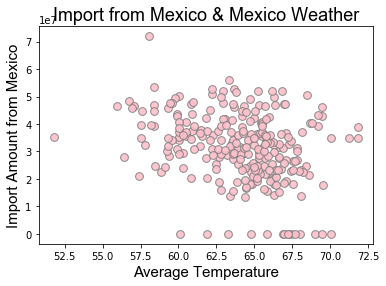

In [27]:

plt.scatter(y=combined_data['Mexico'],x=combined_data['Actual Average Daily Temperature (Degrees Farenheit)'], color = 'pink', alpha = 0.9, edgecolors = 'gray', s = 60)
plt.title('Import from Mexico & Mexico Weather', fontname = 'Arial', fontsize = 18)
plt.ylabel('Import Amount from Mexico', fontname = 'Arial', fontsize = 15)
plt.xlabel('Average Temperature', fontname = 'Arial', fontsize = 15)


# plt.ylim(0,5)
plt.show()


In [33]:
temp_table = pd.DataFrame(combined_data[(combined_data.year == 2014) | 
        (combined_data.year == 2015) |
        (combined_data.year == 2016) |
        (combined_data.year == 2017) |
        (combined_data.year == 2018)].pivot_table(
values = 'Actual Average Daily Temperature (Degrees Farenheit)',
    index = 'year',
    columns = 'month',
    aggfunc = np.mean
)).round(2)
temp_table
supply_table = pd.DataFrame(combined_data[(combined_data.year == 2014) | 
        (combined_data.year == 2015) |
        (combined_data.year == 2016) |
        (combined_data.year == 2017) |
        (combined_data.year == 2018)].pivot_table(
values = 'Mexico',
    index = 'year',
    columns = 'month',
    aggfunc = np.sum
)).round(2)

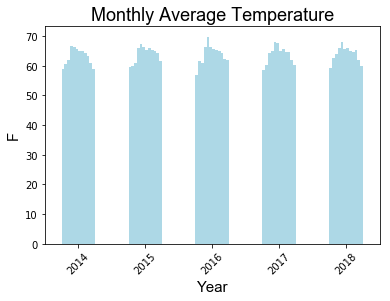

<Figure size 345.6x460.8 with 0 Axes>

In [16]:
temp_table.plot(kind = 'bar', legend = None, color = 'lightblue')
plt.title('Monthly Average Temperature', fontname = 'Arial', fontsize = 18)
plt.ylabel('F', fontname = 'Arial', fontsize = 15)
plt.xlabel('Year', fontname = 'Arial', fontsize = 15)
plt.xticks(rotation = 45)
plt.figure(figsize = [4.8,6.4])

# plt.savefig('type_share_by_region.png', orientation = 'portrait', dpi = 1800, bbox_inches = 'tight')
plt.show()

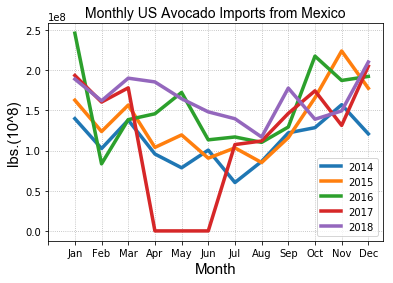

In [55]:
# plot the graph describes the avocado supply trend in California from 2014 to 2018 (line graph)
supply_table.T.plot(linewidth = 3.5)
plt.title('Monthly US Avocado Imports from Mexico', fontname = 'Arial', fontsize = 14)
plt.xticks(np.arange(13),[' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('lbs.(10^8)',fontname = 'Arial', fontsize = 15)
plt.xlabel('Month', fontname = 'Arial', fontsize = 15)
plt.grid(linestyle =':')
plt.legend(loc = 0)
plt.savefig('Monthly US Avocado Imports from Mexico.png', orientation = 'landscape', dpi = 1800)
plt.show()

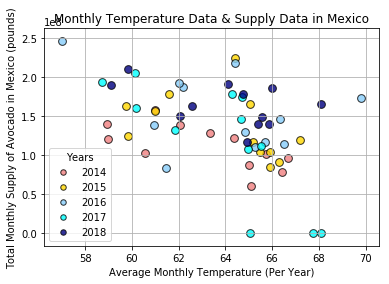

In [42]:
# Obtain the x and y coordinates for the year of 2014
## Retrieve the data with the year 2014
data_2014 = combined_data.loc[combined_data["year"] == 2014,:]
total_monthly_supply_2014 = data_2014.groupby('month')["Mexico"].sum()
average_monthly_temp_2014 = data_2014.groupby('month')["Actual Average Daily Temperature (Degrees Farenheit)"].mean()

# Obtain the x and y coordinates for the year of 2015
## Retrieve the data with the year 2015
data_2015 = combined_data.loc[combined_data["year"] == 2015,:]
total_monthly_supply_2015 = data_2015.groupby('month')["Mexico"].sum()
average_monthly_temp_2015 = data_2015.groupby('month')["Actual Average Daily Temperature (Degrees Farenheit)"].mean()

# Obtain the x and y coordinates for the year of 2016
## Retrieve the data with the year 2016
data_2016 = combined_data.loc[combined_data["year"] == 2016,:]
total_monthly_supply_2016 = data_2016.groupby('month')["Mexico"].sum()
average_monthly_temp_2016 = data_2016.groupby('month')["Actual Average Daily Temperature (Degrees Farenheit)"].mean()

# Obtain the x and y coordinates for the year of 2017
## Retrieve the data with the year 2017
data_2017 = combined_data.loc[combined_data["year"] == 2017,:]
total_monthly_supply_2017 = data_2017.groupby('month')["Mexico"].sum()
average_monthly_temp_2017 = data_2017.groupby('month')["Actual Average Daily Temperature (Degrees Farenheit)"].mean()

# Obtain the x and y coordinates for the year of 2018
## Retrieve the data with the year 2018
data_2018 = combined_data.loc[combined_data["year"] == 2018,:]
total_monthly_supply_2018 = data_2018.groupby('month')["Mexico"].sum()
average_monthly_temp_2018 = data_2018.groupby('month')["Actual Average Daily Temperature (Degrees Farenheit)"].mean()

# Build the scatter plots for each year
scatter2014 = plt.scatter(average_monthly_temp_2014, total_monthly_supply_2014, s=60,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label = "2014")
scatter2015 = plt.scatter(average_monthly_temp_2015, total_monthly_supply_2015, s=60,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label = "2015")
scatter2016 = plt.scatter(average_monthly_temp_2016, total_monthly_supply_2016, s=60,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8, label = "2016")
scatter2017 = plt.scatter(average_monthly_temp_2017, total_monthly_supply_2017, s=60,
            marker="o", facecolors="cyan", edgecolors="black", alpha=0.8, label = "2017")
scatter2018 = plt.scatter(average_monthly_temp_2018, total_monthly_supply_2018, s=60,
            marker="o", facecolors="navy", edgecolors="black", alpha=0.8, label = "2018")

# Incorporate the other graph properties
plt.title("Monthly Temperature Data & Supply Data in Mexico")
plt.xlabel("Average Monthly Temperature (Per Year)")
plt.ylabel("Total Monthly Supply of Avocado in Mexico (pounds)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(loc="best",title = "Years")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
